In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
import time
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def make_teams_stats_url(year):
    season = str(year+1)    
    url = f'https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html'        
    return url

In [20]:
driver = webdriver.Chrome('../chromedriver.exe')

df = pd.DataFrame()

for year in range(2011, 2022):
    print(year)
    driver.get(make_teams_stats_url(year))
    
    time.sleep(2)
    
    table = driver.find_element(By.CLASS_NAME, 'sortable.stats_table.now_sortable')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    tr = thead.find_element(By.TAG_NAME, "tr")
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))
    columns.append('SEASON')
    columns = columns[1:]
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))            
        row.append(season)
        data.append(row)        
        row = []
    df = pd.concat([df, pd.DataFrame(data, columns = columns)])

2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [30]:
player_by_season = df.copy()

In [22]:
player_by_season

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,.438,...,0.6,2.1,2.8,0.1,0.0,0.3,0.3,1.6,2.6,2011-12
1,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,.471,...,0.6,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2011-12
2,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,.286,...,0.0,0.5,0.5,0.3,0.0,0.0,1.3,1.0,2.5,2011-12
3,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,.361,...,1.1,2.3,3.4,0.2,0.1,0.6,0.4,0.8,2.4,2011-12
4,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,.524,...,0.5,1.3,1.8,0.1,0.3,0.6,0.3,0.8,2.2,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-22
838,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22
839,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-22
840,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-22


In [35]:
for column in player_by_season.columns:
    try:
        player_by_season[column] = player_by_season[column].astype('float')
    except:
        continue

In [36]:
player_by_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7374 entries, 0 to 841
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  7374 non-null   object 
 1   Pos     7099 non-null   object 
 2   Age     7099 non-null   float64
 3   Tm      7099 non-null   object 
 4   G       7099 non-null   float64
 5   GS      7099 non-null   float64
 6   MP      7099 non-null   float64
 7   FG      7099 non-null   float64
 8   FGA     7099 non-null   float64
 9   FG%     7099 non-null   object 
 10  3P      7099 non-null   float64
 11  3PA     7099 non-null   float64
 12  3P%     7099 non-null   object 
 13  2P      7099 non-null   float64
 14  2PA     7099 non-null   float64
 15  2P%     7099 non-null   object 
 16  eFG%    7099 non-null   object 
 17  FT      7099 non-null   float64
 18  FTA     7099 non-null   float64
 19  FT%     7099 non-null   object 
 20  ORB     7099 non-null   float64
 21  DRB     7099 non-null   float64
 22  T

In [55]:
temp = player_by_season.query('G >= 20 and MP >= 8')
temp

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
1,Arron Afflalo,SG,26.0,DEN,62.0,62.0,33.6,5.3,11.3,.471,...,0.6,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2011-12
5,LaMarcus Aldridge,PF,26.0,POR,55.0,55.0,36.3,8.8,17.1,.512,...,2.7,5.3,8.0,2.4,0.9,0.8,2.0,2.8,21.7,2011-12
6,Lavoy Allen,PF,22.0,PHI,41.0,15.0,15.2,1.9,4.1,.473,...,1.1,3.0,4.2,0.8,0.3,0.4,0.5,1.8,4.1,2011-12
7,Ray Allen*,SG,36.0,BOS,46.0,42.0,34.0,4.9,10.7,.458,...,0.3,2.8,3.1,2.4,1.1,0.2,1.5,1.8,14.2,2011-12
8,Tony Allen,SG,30.0,MEM,58.0,57.0,26.3,3.6,7.7,.469,...,1.7,2.3,4.0,1.4,1.8,0.6,1.6,2.4,9.8,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33.0,TOR,26.0,0.0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-22
838,Trae Young,PG,23.0,ATL,76.0,76.0,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22
839,Omer Yurtseven,C,23.0,MIA,56.0,12.0,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-22
840,Cody Zeller,C,29.0,POR,27.0,0.0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-22


In [46]:
temp['Pos'].unique()

array(['SG', 'PF', 'SF', 'C', 'PG', 'SF-PF', 'C-PF', 'PF-SF', 'SG-SF',
       'SG-PG', 'PG-SG', 'SF-SG', 'PF-C', 'SG-PF', 'SF-C', 'SG-PG-SF'],
      dtype=object)

In [53]:
temp['Pos'].str.replace('-.+', '').unique()

C:\Users\admin\AppData\Local\Temp\ipykernel_904\44050427.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp['Pos'].str.replace('-.+', '').unique()


array(['SG', 'PF', 'SF', 'C', 'PG'], dtype=object)

In [61]:
temp['Pos'] = temp['Pos'].str.replace('-.+', '')
temp

C:\Users\admin\AppData\Local\Temp\ipykernel_904\3468404589.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp['Pos'] = temp['Pos'].str.replace('-.+', '')
C:\Users\admin\AppData\Local\Temp\ipykernel_904\3468404589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Pos'] = temp['Pos'].str.replace('-.+', '')


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
1,Arron Afflalo,SG,26.0,DEN,62.0,62.0,33.6,5.3,11.3,.471,...,0.6,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2011-12
5,LaMarcus Aldridge,PF,26.0,POR,55.0,55.0,36.3,8.8,17.1,.512,...,2.7,5.3,8.0,2.4,0.9,0.8,2.0,2.8,21.7,2011-12
6,Lavoy Allen,PF,22.0,PHI,41.0,15.0,15.2,1.9,4.1,.473,...,1.1,3.0,4.2,0.8,0.3,0.4,0.5,1.8,4.1,2011-12
7,Ray Allen*,SG,36.0,BOS,46.0,42.0,34.0,4.9,10.7,.458,...,0.3,2.8,3.1,2.4,1.1,0.2,1.5,1.8,14.2,2011-12
8,Tony Allen,SG,30.0,MEM,58.0,57.0,26.3,3.6,7.7,.469,...,1.7,2.3,4.0,1.4,1.8,0.6,1.6,2.4,9.8,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33.0,TOR,26.0,0.0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-22
838,Trae Young,PG,23.0,ATL,76.0,76.0,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22
839,Omer Yurtseven,C,23.0,MIA,56.0,12.0,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-22
840,Cody Zeller,C,29.0,POR,27.0,0.0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-22


In [62]:
main_player = temp.reset_index(drop=True)

In [65]:
main_player.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

In [67]:
main_player['3PA'] / main_player['FGA']

0       0.318584
1       0.011696
2       0.000000
3       0.476636
4       0.051948
          ...   
5128    0.309091
5129    0.394089
5130    0.045455
5131    0.030303
5132    0.000000
Length: 5133, dtype: float64

In [112]:
by_pos_3pa = main_player.groupby(['SEASON', 'Pos'])[['3PA', 'FGA']].apply(lambda x : np.mean(x['3PA']/ x['FGA']))

In [113]:
by_pos_3pa = by_pos_3pa.reset_index().rename(columns={0 : '3PA%'})
by_pos_3pa['2PA%'] = 1 - by_pos_3pa['3PA%']
by_pos_3pa

,SEASON,Pos,3PA%,2PA%
0,2011-12,C,0.009969,0.990031
1,2011-12,PF,0.112905,0.887095
2,2011-12,PG,0.297397,0.702603
3,2011-12,SF,0.346003,0.653997
4,2011-12,SG,0.349022,0.650978
5,2012-13,C,0.012631,0.987369
6,2012-13,PF,0.131126,0.868874
7,2012-13,PG,0.343491,0.656509
8,2012-13,SF,0.348326,0.651674
9,2012-13,SG,0.385412,0.614588


In [126]:
c_pa = by_pos_3pa[by_pos_3pa['Pos'] == 'C'].set_index('SEASON').iloc[:,1:]
pf_pa = by_pos_3pa[by_pos_3pa['Pos'] == 'PF'].set_index('SEASON').iloc[:,1:]
sf_pa = by_pos_3pa[by_pos_3pa['Pos'] == 'SF'].set_index('SEASON').iloc[:,1:]
sg_pa = by_pos_3pa[by_pos_3pa['Pos'] == 'SG'].set_index('SEASON').iloc[:,1:]
pg_pa = by_pos_3pa[by_pos_3pa['Pos'] == 'PG'].set_index('SEASON').iloc[:,1:]

In [270]:
pos_df_li = [c_pa, pf_pa, sf_pa, sg_pa, pg_pa]
pos_name_li = ['CENTER', 'POWER FOWARD', 'SAMLL FOWARD', 'SHOOTING GUARD', 'POINT GUARD']

In [127]:
c_pa

,3PA%,2PA%
SEASON,,
2011-12,0.009969,0.990031
2012-13,0.012631,0.987369
2013-14,0.049233,0.950767
2014-15,0.035534,0.964466
2015-16,0.044994,0.955006
2016-17,0.078334,0.921666
2017-18,0.103593,0.896407
2018-19,0.131290,0.868710
2019-20,0.193088,0.806912


In [156]:
c_pa.index.values

array(['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
      dtype=object)

In [160]:
def bar_text(df):
    for n, x in enumerate(df.index.values):
        for (precentage, y_loc) in zip(df.loc[x],
                                       df.loc[x].cumsum()):


            plt.text(x=n - 0.2,
                     y=(y_loc - precentage) + (precentage / 2),
                     s=f'{np.round(precentage * 100, 1)}%', 
                     color="black",
                     fontsize=6,
                     fontweight="bold")

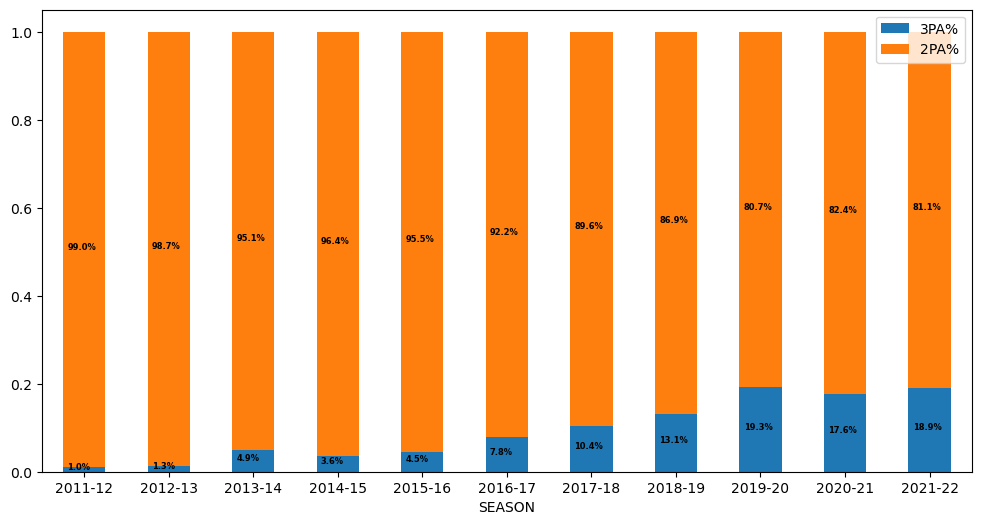

In [291]:
c_pa.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xticks(rotation=360)

bar_text(c_pa)

plt.show()



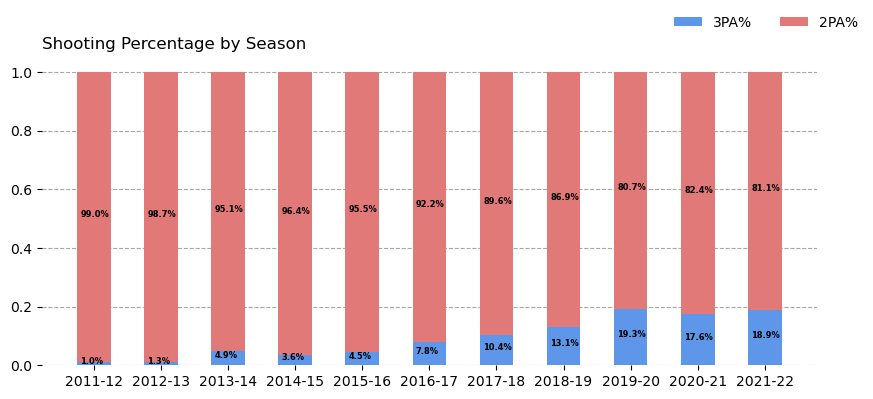

In [293]:
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.bar(c_pa.index, c_pa['3PA%'], color = '#5E96E9', width =0.5)
# plt.bar(c_pa.index, c_pa['2PA%'], color = '#DB4444', width =0.5)
plt.bar(c_pa.index, c_pa['2PA%'], bottom = c_pa['3PA%'], color = '#E17979', width =0.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

legend_label = ['3PA%', '2PA%']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([0.8, 1.05, 0, 0]), frameon = False) #  옵션 뺸거 

plt.title('Shooting Percentage by Season', loc='left')
bar_text(c_pa)
plt.show()

In [280]:
def stack_barplot(bar_df, title_pos):
    fig, ax = plt.subplots(1, figsize=(10, 4))
    plt.bar(bar_df.index, bar_df['3PA%'], color = '#5E96E9', width =0.5)
    # plt.bar(c_pa.index, c_pa['2PA%'], color = '#DB4444', width =0.5)
    plt.bar(bar_df.index, bar_df['2PA%'], bottom = bar_df['3PA%'], color = '#E17979', width =0.5)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

    legend_label = ['3PA%', '2PA%']
    plt.legend(legend_label, ncol = 2) # , bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False 옵션 뺸거 

    plt.title(f'{title_pos} SHOOTING PERCENTAGE', loc='left')
    bar_text(bar_df)

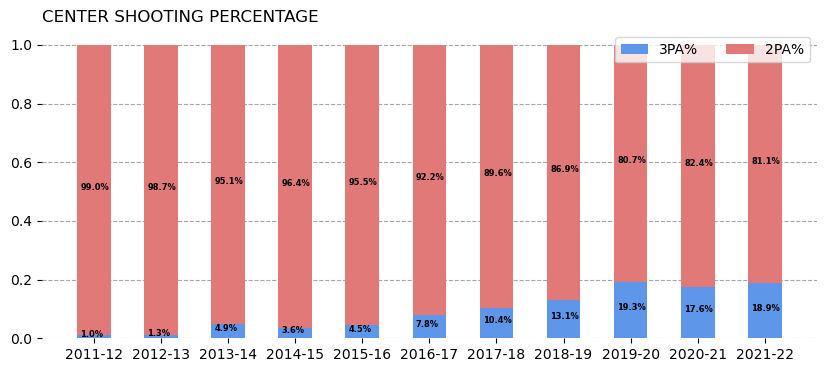

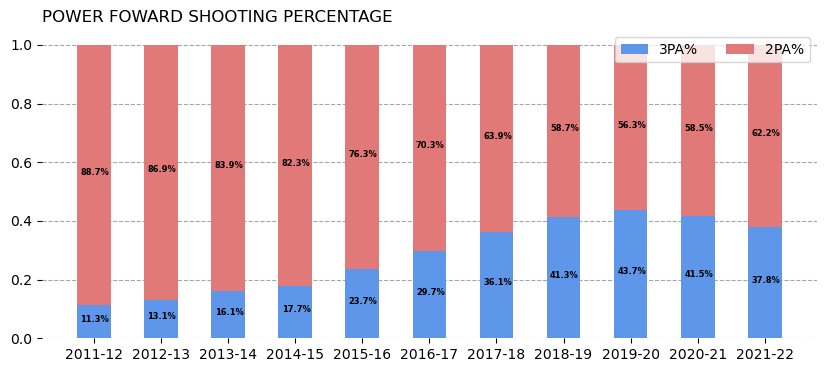

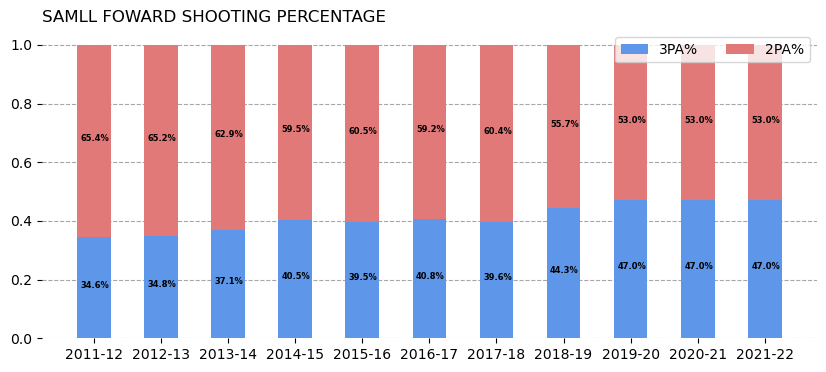

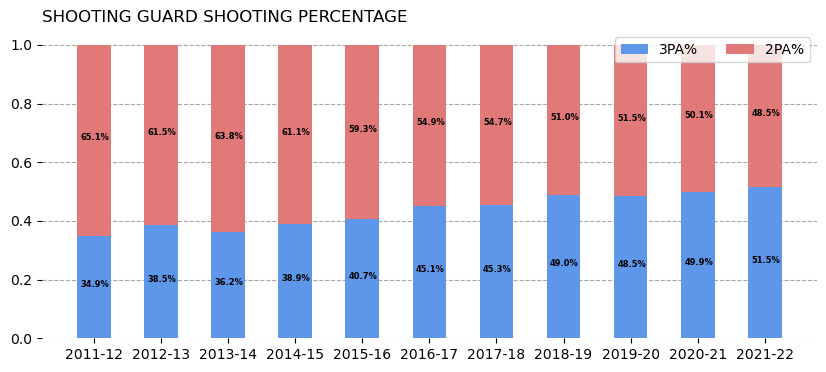

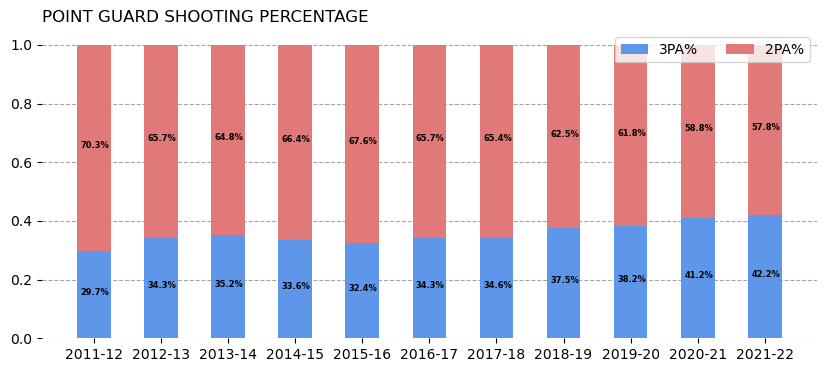

<Figure size 640x480 with 0 Axes>

In [285]:
for i in range(5):
    stack_barplot(pos_df_li[i], pos_name_li[i])
    
plt.show()

plt.savefig('shooting_percentage_by_position.png',dpi = 300)

In [282]:
for i in pos_df_li:
    print(i)

             3PA%      2PA%
SEASON                     
2011-12  0.009969  0.990031
2012-13  0.012631  0.987369
2013-14  0.049233  0.950767
2014-15  0.035534  0.964466
2015-16  0.044994  0.955006
2016-17  0.078334  0.921666
2017-18  0.103593  0.896407
2018-19  0.131290  0.868710
2019-20  0.193088  0.806912
2020-21  0.176319  0.823681
2021-22  0.189218  0.810782
             3PA%      2PA%
SEASON                     
2011-12  0.112905  0.887095
2012-13  0.131126  0.868874
2013-14  0.160804  0.839196
2014-15  0.176548  0.823452
2015-16  0.236791  0.763209
2016-17  0.296659  0.703341
2017-18  0.361051  0.638949
2018-19  0.412991  0.587009
2019-20  0.436562  0.563438
2020-21  0.415426  0.584574
2021-22  0.377982  0.622018
             3PA%      2PA%
SEASON                     
2011-12  0.346003  0.653997
2012-13  0.348326  0.651674
2013-14  0.370545  0.629455
2014-15  0.404710  0.595290
2015-16  0.395026  0.604974
2016-17  0.407615  0.592385
2017-18  0.396494  0.603506
2018-19  0.443025  0